# <span style="color:darkblue">05-Plotting</span>

In this notebook, we will create plots for all the conditions and RNAs in our dataset. Some of these figure were also used in the publication linked to this dataset. 

## 5.1 - Load libraries

In [1]:
from glob import glob
from pathlib import Path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import os

In [2]:
# adjust plotting settings
font = {'family' : 'Leelawadee UI',
        'weight' : 'bold',
        'size'   : 18}

matplotlib.rc('font', **font)

In [7]:
# paths
root_dir = '../data/Chip_B_Spider_1_EFG1_HWP1_24HR_RESULTSDONE/'

In [8]:
files = glob(f"{root_dir}/Results/*.csv")

dfs = []
for file in files:
    print(f'loading {file} ...')
    filename=Path(file).stem
    df = pd.read_csv(file)
    df['strain'], df['mRNA'], df['condition'], df['channel'], df['fov'] = filename.split('_')
    dfs.append(df)
    print('... done')
df = pd.concat(dfs).reset_index()

loading ../data/Chip_B_Spider_1_EFG1_HWP1_24HR_RESULTSDONE//Results\CET111_EFG1Q670_Spider_CY5_01.csv ...
... done
loading ../data/Chip_B_Spider_1_EFG1_HWP1_24HR_RESULTSDONE//Results\CET111_EFG1Q670_Spider_CY5_03.csv ...
... done
loading ../data/Chip_B_Spider_1_EFG1_HWP1_24HR_RESULTSDONE//Results\CET111_EFG1Q670_Spider_CY5_04.csv ...
... done
loading ../data/Chip_B_Spider_1_EFG1_HWP1_24HR_RESULTSDONE//Results\CET111_EFG1Q670_Spider_CY5_05.csv ...
... done
loading ../data/Chip_B_Spider_1_EFG1_HWP1_24HR_RESULTSDONE//Results\CET111_EFG1Q670_Spider_CY5_06.csv ...
... done
loading ../data/Chip_B_Spider_1_EFG1_HWP1_24HR_RESULTSDONE//Results\CET111_EFG1Q670_Spider_CY5_07.csv ...
... done
loading ../data/Chip_B_Spider_1_EFG1_HWP1_24HR_RESULTSDONE//Results\CET111_HWP1Q610_Spider_CY3_01.csv ...
... done
loading ../data/Chip_B_Spider_1_EFG1_HWP1_24HR_RESULTSDONE//Results\CET111_HWP1Q610_Spider_CY3_03.csv ...
... done
loading ../data/Chip_B_Spider_1_EFG1_HWP1_24HR_RESULTSDONE//Results\CET111_HWP1Q

In [9]:
# inspect data
df.head()

counts = df['mRNA'].value_counts()
print(counts)

#Still have to implement counts in each graph to represent cell numbers

mRNA
EFG1Q670    328
HWP1Q610    328
Name: count, dtype: int64


In [10]:
# store variables:

mRNAs = df['mRNA'].unique()
conditions = df['condition'].unique()

***

In [3]:
# Define the input path
input_path = '../data/Plotting'
output_path = '../data/plots'

In [4]:
# Define the list of folders
folders = ['CLB2', 'HWP1', 'EFG1']

# Define the list of subfolders
subfolders = ['Spider', 'SC D-Mannitol']

# Define the list of time points
time_points = ['6hr', '24hr']

# Create an empty list to store DataFrames
dfs_list = []

# Iterate over each folder
for folder in folders:
    # Iterate over each subfolder
    for subfolder in subfolders:
        # Iterate over each time point
        for time_point in time_points:
            # Construct the path to the CSV file
            file_path = os.path.join(input_path, folder, subfolder, time_point)
            # List all CSV files in the directory
            files = [f for f in os.listdir(file_path) if f.endswith('.csv')]
            # Iterate over each file
            for file in files:
                # Load the CSV file
                df = pd.read_csv(os.path.join(file_path, file))
                # Add columns for folder, subfolder, time point, and filename
                df['Folder'] = folder
                df['Subfolder'] = subfolder
                df['Time Point'] = time_point
                df['Filename'] = file  # Add filename column
                # Append the DataFrame to the list
                dfs_list.append(df)

# Concatenate all DataFrames in the list into a single DataFrame
combined_data = pd.concat(dfs_list, ignore_index=True)

# Now you have a combined DataFrame 'combined_data' containing all the data from the CSV files
# You can perform your analysis or comparison on this DataFrame

print(combined_data)

combined_data.to_csv(f'{output_path}/combined_data.csv', index=False)

      Unnamed: 0  label  bbox-0  bbox-1  bbox-2  bbox-3     area  \
0              0      1     322     250     396     322   2527.0   
1              1      2     270     276     319     305   1091.0   
2              2      3      21     316     327     435   6939.0   
3              3      4       0     416      40     471   1111.0   
4              4      5     449     347     569     405   4167.0   
...          ...    ...     ...     ...     ...     ...      ...   
3728          69     71    1701     733    1765     774   1940.0   
3729          70     72    1635     724    1686     763   1449.0   
3730          71     73    1662     708    1707     739   1006.0   
3731          72     74     771     974     831    1035   2612.0   
3732          73     75     541    1161     763    1778  14672.0   

      eccentricity  spots_per_cell  dense_regions_per_cell  decomposed_RNAs  \
0         0.936433               3                       0                0   
1         0.835349       

### Plotting scatterplots overlaying with boxplots, for each timepoint and medium

Folder: CLB2
Time_Subfolder: 24hr SC D-Mannitol, Mean: 4.179775280898877, Standard Deviation: 6.753049475729816
Time_Subfolder: 24hr Spider, Mean: 2.756521739130435, Standard Deviation: 4.066532865963566
Time_Subfolder: 6hr SC D-Mannitol, Mean: 2.826972010178117, Standard Deviation: 4.5328264419439215
Time_Subfolder: 6hr Spider, Mean: 2.9483870967741934, Standard Deviation: 4.481235307594727
Folder: HWP1
Time_Subfolder: 24hr SC D-Mannitol, Mean: 24.2853470437018, Standard Deviation: 69.30110095817993
Time_Subfolder: 24hr Spider, Mean: 4.4125, Standard Deviation: 10.469393208514454
Time_Subfolder: 6hr SC D-Mannitol, Mean: 2.908196721311475, Standard Deviation: 7.220985088108284
Time_Subfolder: 6hr Spider, Mean: 2.8300492610837438, Standard Deviation: 8.363836528713891
Folder: EFG1
Time_Subfolder: 24hr SC D-Mannitol, Mean: 1.92, Standard Deviation: 2.7927761568388108
Time_Subfolder: 24hr Spider, Mean: 4.615853658536586, Standard Deviation: 5.586571262763191
Time_Subfolder: 6hr SC D-Manni

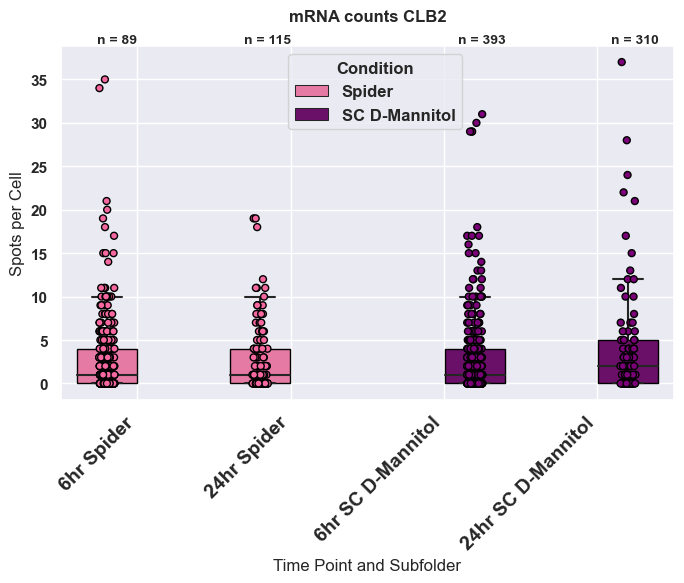

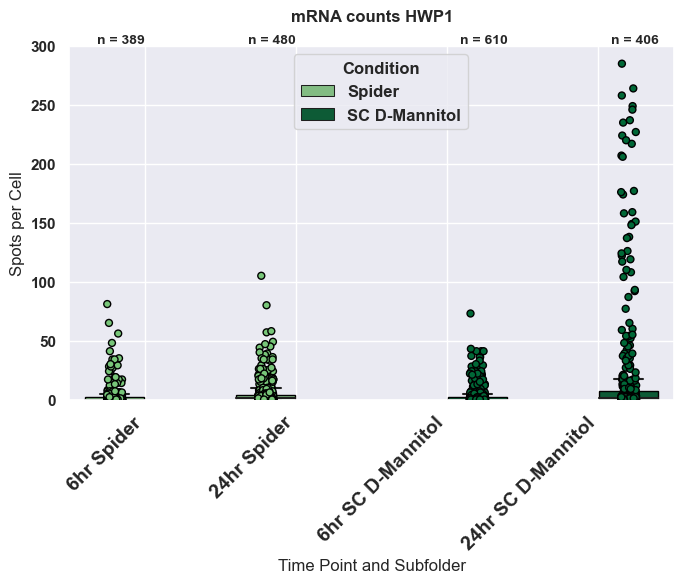

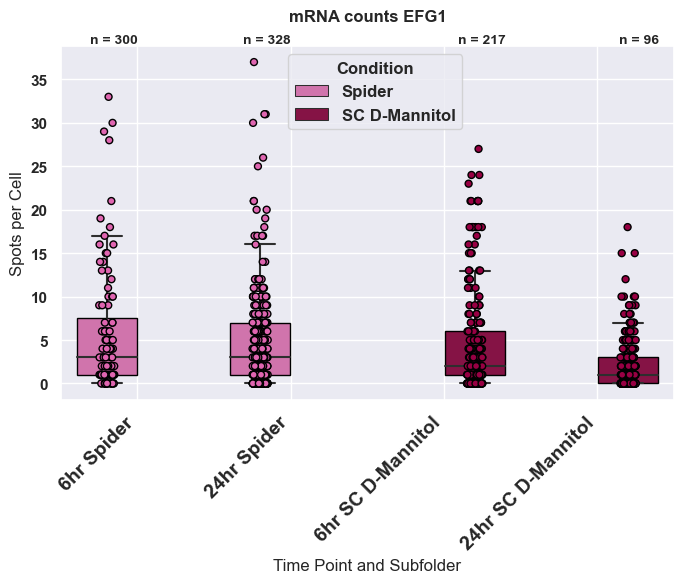

In [8]:
from importlib import reload
reload(plt)

# Define custom color palettes for each folder
custom_palettes = {
    'CLB2': {'Spider': '#f768a1', 'SC D-Mannitol': '#7a0177'},  # Example colors for subfolders in CLB2
    'HWP1': {'Spider': '#78c679', 'SC D-Mannitol': '#006837'},  # Example colors for subfolders in HWP1
    'EFG1': {'Spider': '#df65b0', 'SC D-Mannitol': '#980043'}  # Example colors for subfolders in EFG1
}

# Combine Time Point and Subfolder to create a new column for x-axis
combined_data['Time_Subfolder'] = combined_data['Time Point'] + ' ' + combined_data['Subfolder']

# Filter data for each folder (CLB2, HWP1, EFG1)
folders = ['CLB2', 'HWP1', 'EFG1']

for folder in folders:
    folder_data = combined_data[combined_data['Folder'] == folder]
    
    # Calculate mean and standard deviation of spots_per_cell for each Time_Subfolder
    mean_values = folder_data.groupby('Time_Subfolder')['spots_per_cell'].mean()
    std_deviation = folder_data.groupby('Time_Subfolder')['spots_per_cell'].std()
    
    # Print the mean and standard deviation for each Time_Subfolder
    print(f"Folder: {folder}")
    for time_subfolder, mean, std in zip(mean_values.index, mean_values, std_deviation):
        print(f"Time_Subfolder: {time_subfolder}, Mean: {mean}, Standard Deviation: {std}")
            
for folder in folders:
    folder_data = combined_data[combined_data['Folder'] == folder]
    
    # Create figure and axes
    plt.figure(figsize=(7, 6))
      
    # Create box plot without outliers
    sns.boxplot(data=folder_data, 
                x='Time_Subfolder', 
                y='spots_per_cell', 
                hue='Subfolder', 
                palette=custom_palettes[folder], 
                showfliers=False, 
                boxprops=dict(edgecolor='black', linewidth=1),
                width=0.8,
                dodge=True
               )
    
    # Overlay scatter plot with stripplot
    sns.stripplot(data=folder_data, 
                  x='Time_Subfolder', 
                  y='spots_per_cell', 
                  hue='Subfolder',
                  palette=custom_palettes[folder],
                  dodge = True,               
                  edgecolor='black', 
                  linewidth =1, 
                  alpha=1, 
                  marker='o',
                  legend=False
                 )
    
    # Set y-axis limit
    #plt.ylim(0, 170)
    if folder == 'HWP1':
        plt.ylim(0,300)
        
    # Set plot title and labels
    plt.title(f'mRNA counts {folder}',pad=18,fontweight='bold')
    plt.xlabel('Time Point and Subfolder')
    plt.ylabel('Spots per Cell')
    plt.legend(title='Condition',title_fontsize = 12 ,fontsize = 12, bbox_to_anchor=(0.3577, 1.0), loc='upper left')
    plt.xticks(rotation=45, ha='right', fontsize = 14)  # Rotate x-axis labels for better readability
    plt.grid(True)
    sns.set(style="darkgrid")  
    
    # Add number of cells (n) at the top of each column
    cell_count = folder_data.groupby('Time_Subfolder')['spots_per_cell'].count()
    for i, count in enumerate(cell_count):
        if folder == 'HWP1':
            if i > 1:
                plt.text(i+0.4, 300, f'n = {count}', ha='right', va='bottom', fontsize=10)
            else:
                plt.text(i, 300, f'n = {count}', ha='right', va='bottom', fontsize=10)
        else:
            max_y_value = folder_data['spots_per_cell'].max()
            if i > 1:
                plt.text(i+0.4, max_y_value+1.8, f'n = {count}', ha='right', va='bottom', fontsize=10)
            else:
                plt.text(i, max_y_value+1.8, f'n = {count}', ha='right', va='bottom', fontsize=10)
                    
    plt.tight_layout()    
    plt.savefig(f'{output_path}/mRNACounts{folder}.png', bbox_inches='tight', dpi=500)
    plt.show()


In [34]:
from scipy.stats import ttest_ind

# Define folders and subfolders
folders = ['CLB2', 'HWP1', 'EFG1']
subfolders = ['Spider', 'SC D-Mannitol']

# Perform t-tests for each folder and subfolder combination
for folder in folders:
    for subfolder in subfolders:
        # Filter data for the specific folder and subfolder at 6hr and 24hr time points
        data_6hr = combined_data[(combined_data['Folder'] == folder) & 
                                  (combined_data['Subfolder'] == subfolder) & 
                                  (combined_data['Time Point'] == '6hr')]['spots_per_cell']
        
        data_24hr = combined_data[(combined_data['Folder'] == folder) & 
                                   (combined_data['Subfolder'] == subfolder) & 
                                   (combined_data['Time Point'] == '24hr')]['spots_per_cell']
        
        # Perform Student's t-test
        t_statistic, p_value = ttest_ind(data_6hr, data_24hr)
        
        # Print the results
        print(f"Folder: {folder}, Subfolder: {subfolder}, p-value: {p_value}")

Folder: CLB2, Subfolder: Spider, p-value: 0.6880285149379706
Folder: CLB2, Subfolder: SC D-Mannitol, p-value: 0.021970604075692856
Folder: HWP1, Subfolder: Spider, p-value: 0.014307884847273453
Folder: HWP1, Subfolder: SC D-Mannitol, p-value: 9.346877477519215e-14
Folder: EFG1, Subfolder: Spider, p-value: 0.08681437266579022
Folder: EFG1, Subfolder: SC D-Mannitol, p-value: 3.9351326135813875e-12


Folder: CLB2
Time_Subfolder: 24hr SC D-Mannitol, Mean: 0.16970000094735088, Standard Deviation: 0.39554298719787295
Time_Subfolder: 24hr Spider, Mean: 0.030801431613124052, Standard Deviation: 0.06254054419669826
Time_Subfolder: 6hr SC D-Mannitol, Mean: 0.12644729998063456, Standard Deviation: 0.1974287818330845
Time_Subfolder: 6hr Spider, Mean: 0.13624776373606767, Standard Deviation: 0.19449451481736466
Folder: HWP1
Time_Subfolder: 24hr SC D-Mannitol, Mean: 0.8887170089209329, Standard Deviation: 2.948728172969077
Time_Subfolder: 24hr Spider, Mean: 0.05299457293110828, Standard Deviation: 0.11742278011570531
Time_Subfolder: 6hr SC D-Mannitol, Mean: 0.04502484813631344, Standard Deviation: 0.10612178015589324
Time_Subfolder: 6hr Spider, Mean: 0.057853314143968146, Standard Deviation: 0.11734885838550027
Folder: EFG1
Time_Subfolder: 24hr SC D-Mannitol, Mean: 0.0749900217126718, Standard Deviation: 0.14302441607977967
Time_Subfolder: 24hr Spider, Mean: 0.16234182492018023, Standard Devi

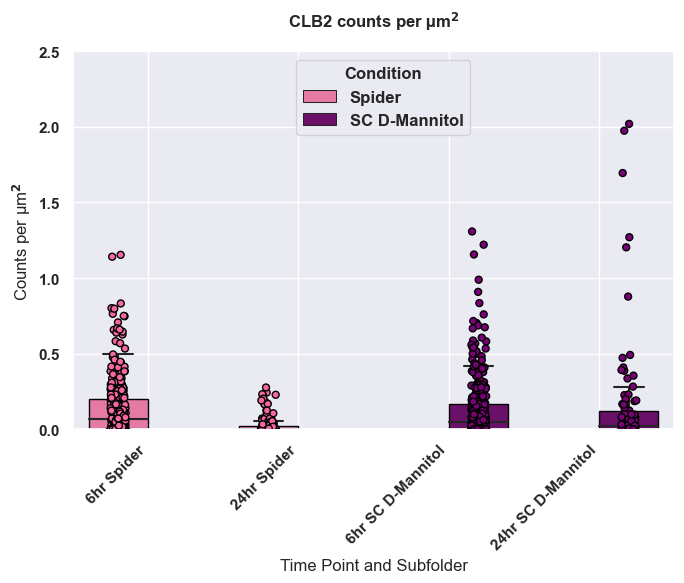

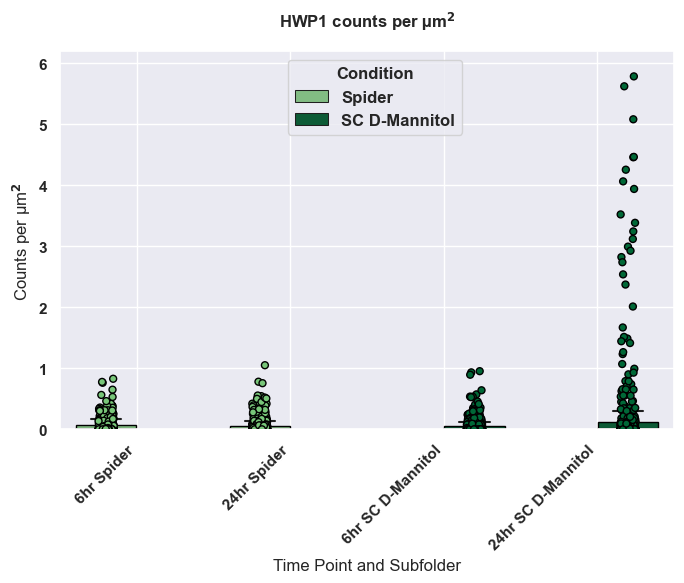

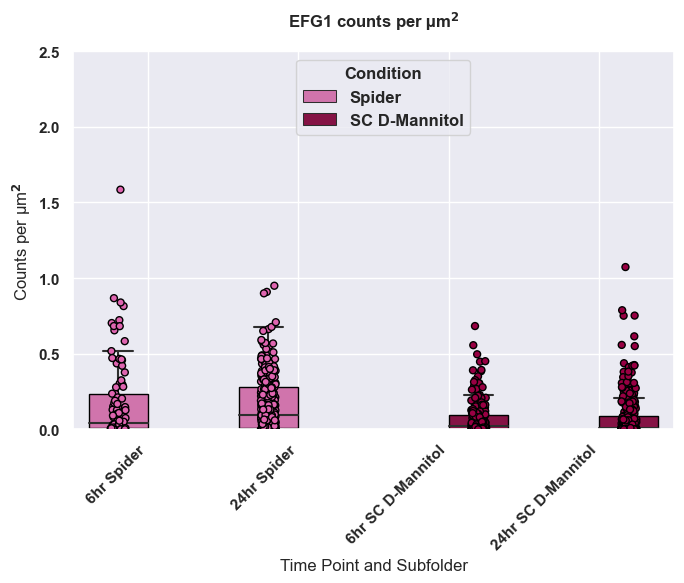

In [10]:
# Reload matplotlib to ensure changes take effect
reload(plt)

# Define custom color palettes for each folder
custom_palettes = {
    'CLB2': {'Spider': '#f768a1', 'SC D-Mannitol': '#7a0177'},  # Example colors for subfolders in CLB2
    'HWP1': {'Spider': '#78c679', 'SC D-Mannitol': '#006837'},  # Example colors for subfolders in HWP1
    'EFG1': {'Spider': '#df65b0', 'SC D-Mannitol': '#980043'}  # Example colors for subfolders in EFG1
}

# Define pixel size in microns
pixel_size = 0.0645  # Example: 0.1 micron per pixel (replace with your actual pixel size)


# Combine Time Point and Subfolder to create a new column for x-axis
combined_data['Time_Subfolder'] = combined_data['Time Point'] + ' ' + combined_data['Subfolder']

# Recalculate area into pixel x pixel and then convert to square micron
combined_data['pixel_x_pixel'] = (combined_data['bbox-2'] - combined_data['bbox-0']) * (combined_data['bbox-3'] - combined_data['bbox-1'])
combined_data['area_square_micron'] = combined_data['pixel_x_pixel'] * (0.0645 ** 2)
combined_data['mRNA_counts_per_square_micron'] = combined_data['spots_per_cell'] / combined_data['area_square_micron']

# Filter data for each folder (CLB2, HWP1, EFG1)
folders = ['CLB2', 'HWP1', 'EFG1']

for folder in folders:
    folder_data = combined_data[combined_data['Folder'] == folder]
    
    # Calculate mean and standard deviation of spots_per_cell for each Time_Subfolder
    mean_values = folder_data.groupby('Time_Subfolder')['mRNA_counts_per_square_micron'].mean()
    std_deviation = folder_data.groupby('Time_Subfolder')['mRNA_counts_per_square_micron'].std()
    
    # Print the mean and standard deviation for each Time_Subfolder
    print(f"Folder: {folder}")
    for time_subfolder, mean, std in zip(mean_values.index, mean_values, std_deviation):
        print(f"Time_Subfolder: {time_subfolder}, Mean: {mean}, Standard Deviation: {std}")

for folder in folders:
    folder_data = combined_data[combined_data['Folder'] == folder]
    

    # Create figure and axes
    plt.figure(figsize=(7, 6))
    
    # Create box plot without outliers
    sns.boxplot(data=folder_data, 
                x='Time_Subfolder', 
                y='mRNA_counts_per_square_micron', 
                hue='Subfolder', 
                palette=custom_palettes[folder], 
                showfliers=False, 
                boxprops=dict(edgecolor='black', linewidth=1),
                width=0.8
               )
    
    # Overlay scatter plot with stripplot
    sns.stripplot(data=folder_data, 
                  x='Time_Subfolder', 
                  y='mRNA_counts_per_square_micron', 
                  hue='Subfolder',
                  palette=custom_palettes[folder], 
                  dodge=True, 
                  edgecolor='black', 
                  linewidth=1, 
                  alpha=1, 
                  marker='o',
                  legend=False
                 )
    
    
    if folder == 'HWP1':
        plt.ylim(0,6.2)
    else:
        plt.ylim(0,2.5)
        
    # Set plot title and labels
    plt.title(f'{folder} counts per µm$^2$', pad=18, fontweight='bold')
    plt.xlabel('Time Point and Subfolder')
    plt.ylabel('Counts per µm$^2$')
    plt.legend(title='Condition', title_fontsize = 12,fontsize =12, bbox_to_anchor=(0.3577, 1.0), loc='upper left')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.grid(True)
    # Add number of cells (n) at the top of each column


    plt.tight_layout()
    plt.savefig(f'{output_path}/mRNACountsSquaredMicron{folder}.png', bbox_inches='tight', dpi=500)

    
    plt.show()

In [36]:
# Define folders and subfolders
folders = ['CLB2', 'HWP1', 'EFG1']
subfolders = ['Spider', 'SC D-Mannitol']

# Perform t-tests for each folder and subfolder combination
for folder in folders:
    for subfolder in subfolders:
        # Filter data for the specific folder and subfolder at 6hr and 24hr time points
        data_6hr = combined_data[(combined_data['Folder'] == folder) & 
                                  (combined_data['Subfolder'] == subfolder) & 
                                  (combined_data['Time Point'] == '6hr')]['mRNA_counts_per_square_micron']
        
        data_24hr = combined_data[(combined_data['Folder'] == folder) & 
                                   (combined_data['Subfolder'] == subfolder) & 
                                   (combined_data['Time Point'] == '24hr')]['mRNA_counts_per_square_micron']
        
        # Perform Student's t-test
        t_statistic, p_value = ttest_ind(data_6hr, data_24hr)
        
        # Print the results
        print(f"Folder: {folder}, Subfolder: {subfolder}, p-value: {p_value}")
        
#Significance (*, **, ***, ****) was added to plots using powerpoint

Folder: CLB2, Subfolder: Spider, p-value: 2.2265514226857098e-08
Folder: CLB2, Subfolder: SC D-Mannitol, p-value: 0.1348477539700088
Folder: HWP1, Subfolder: Spider, p-value: 0.5394712791847869
Folder: HWP1, Subfolder: SC D-Mannitol, p-value: 3.0854147313332827e-12
Folder: EFG1, Subfolder: Spider, p-value: 0.5718226205065099
Folder: EFG1, Subfolder: SC D-Mannitol, p-value: 0.7573611755408385


### KDE eccentricity plots with overlaying scatterplots

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
from importlib import reload

reload(plt)

# Define custom color palettes for each folder
custom_palettes = {
    'CLB2': {'Spider': '#f768a1', 'SC D-Mannitol': '#7a0177'},  
    'HWP1': {'Spider': '#78c679', 'SC D-Mannitol': '#006837'},  
    'EFG1': {'Spider': '#df65b0', 'SC D-Mannitol': '#980043'}  
}

# Combine Time Point and Subfolder to create a new column for x-axis
combined_data['Time_Subfolder'] = combined_data['Time Point'] + ' ' + combined_data['Subfolder']

# Filter data for each folder (CLB2, HWP1, EFG1)
folders = ['CLB2', 'HWP1', 'EFG1']
time_points = ['6hr', '24hr']
for folder in folders:
    for time_point in time_points:
        folder_data = combined_data[(combined_data['Folder'] == folder) & (combined_data['Time Point'] == time_point)]

        # Create figure and axes
        plt.figure(figsize=(6, 4))
        
        # Create KDE plot
        sns.kdeplot(data=folder_data, x='spots_per_cell', y='eccentricity', hue='Subfolder', palette=custom_palettes[folder])
        
        # Overlay scatter plot
        sns.scatterplot(data=folder_data, x='spots_per_cell', y='eccentricity', hue='Subfolder', palette=custom_palettes[folder])
        
        plt.xlim(0, 70)
        plt.ylim(0, 1)
        
        # Set plot title and labels
        plt.title(f'mRNA counts and Eccentricity {folder} - {time_point}', pad=18, fontweight='bold')
        plt.xlabel('Spots per Cell')
        plt.ylabel('Eccentricity')
        plt.legend(title='Condition', bbox_to_anchor=(0.6, 0.4), title_fontsize=14, fontsize=12, loc='upper left')
        plt.grid(True)
        
        # Calculate Pearson correlation coefficient for each subfolder
        subfolders = folder_data['Subfolder'].unique()
        for subfolder in subfolders:
            subfolder_data = folder_data[folder_data['Subfolder'] == subfolder]
            correlation_coefficient, _ = pearsonr(subfolder_data['spots_per_cell'], subfolder_data['eccentricity'])
            print(f"Folder: {folder}, Time Point: {time_point}, Subfolder: {subfolder}, Pearson correlation coefficient: {correlation_coefficient:.4f}")
        
        plt.tight_layout()
        plt.savefig(f'{output_path}/mRNACountsEccentricity_{folder}_{time_point}.png', bbox_inches='tight', dpi=500)
        plt.show()

NameError: name 'plt' is not defined

### Scatterplots with overlaying boxplots for each mRNA, timepoint, medium. mRNA counts per square micron plotted

Folder: CLB2, Subfolder: Spider, Cell Type: Yeastlike
6hr: Mean: 0.18, SD: 0.24
24hr: Mean: 0.05, SD: 0.09

Folder: CLB2, Subfolder: Spider, Cell Type: Pseudohyphae
6hr: Mean: 0.13, SD: 0.15
24hr: Mean: 0.02, SD: 0.04

Folder: CLB2, Subfolder: Spider, Cell Type: Hyphae
6hr: Mean: 0.07, SD: 0.11
24hr: Mean: 0.01, SD: 0.02

Folder: CLB2, Subfolder: SC D-Mannitol, Cell Type: Yeastlike
6hr: Mean: 0.21, SD: 0.26
24hr: Mean: 0.41, SD: 0.61

Folder: CLB2, Subfolder: SC D-Mannitol, Cell Type: Pseudohyphae
6hr: Mean: 0.11, SD: 0.14
24hr: Mean: 0.05, SD: 0.08

Folder: CLB2, Subfolder: SC D-Mannitol, Cell Type: Hyphae
6hr: Mean: 0.05, SD: 0.09
24hr: Mean: 0.05, SD: 0.09

Folder: HWP1, Subfolder: Spider, Cell Type: Yeastlike
6hr: Mean: 0.08, SD: 0.15
24hr: Mean: 0.06, SD: 0.15

Folder: HWP1, Subfolder: Spider, Cell Type: Pseudohyphae
6hr: Mean: 0.06, SD: 0.10
24hr: Mean: 0.05, SD: 0.09

Folder: HWP1, Subfolder: Spider, Cell Type: Hyphae
6hr: Mean: 0.03, SD: 0.05
24hr: Mean: 0.04, SD: 0.08

Folder:

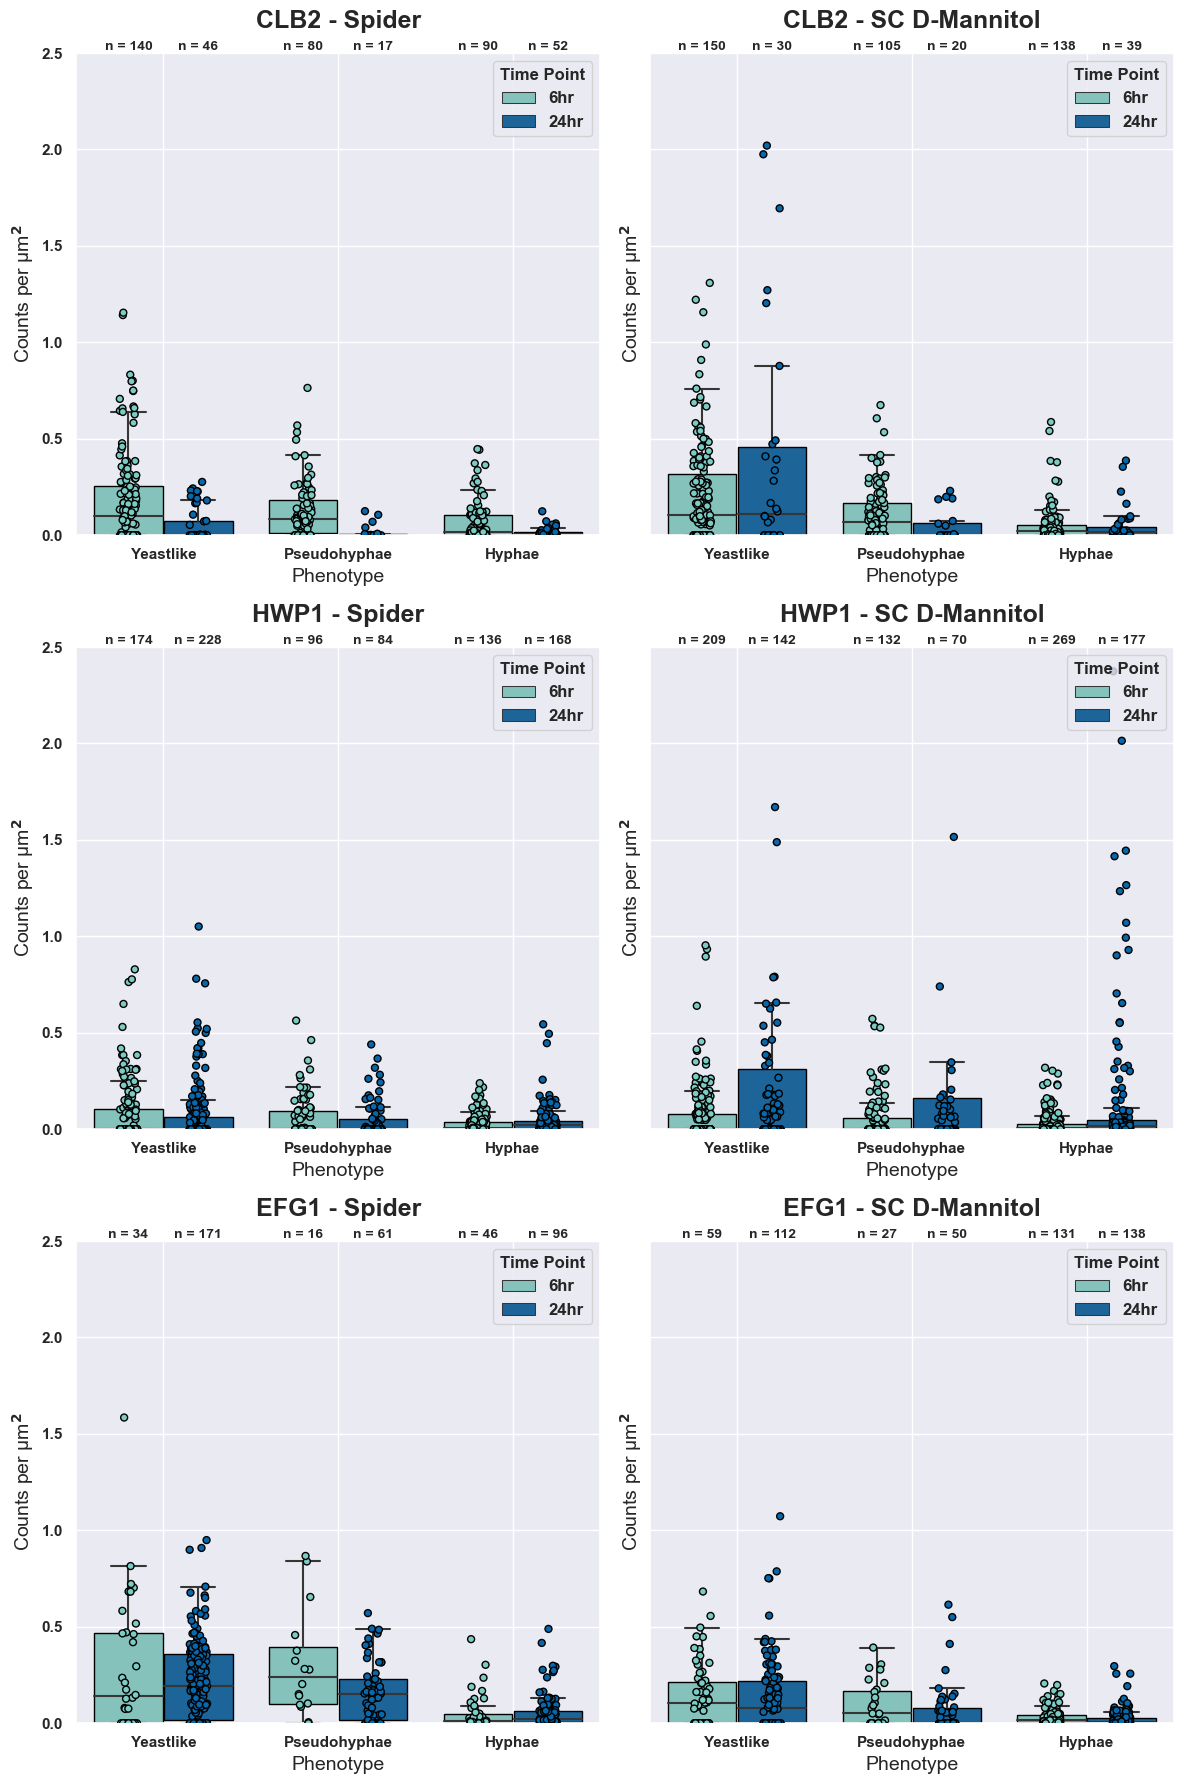

In [13]:
# Reload matplotlib to ensure changes take effect
from importlib import reload
reload(plt)

# Combine Time Point and Subfolder to create a new column for x-axis
combined_data['Time_Subfolder'] = combined_data['Time Point'] + ' ' + combined_data['Subfolder']

# Create Cell_Type column based on eccentricity values
def categorize_eccentricity(eccentricity):
    if eccentricity < 0.85:
        return 'Yeastlike'
    elif 0.85 <= eccentricity < 0.95:
        return 'Pseudohyphae'
    else:
        return 'Hyphae'

combined_data['Cell_Type'] = combined_data['eccentricity'].apply(categorize_eccentricity)

# Define custom color palettes for each subfolder

# Create subplots for each folder and subfolder combination
fig, axes = plt.subplots(3, 2, figsize=(12, 18), sharey=True)

# Define the order of x-axis categories
order = ['Yeastlike', 'Pseudohyphae', 'Hyphae']
custom_palette = {'6hr': '#7bccc4', '24hr': '#0868ac'}

# Loop through each folder and subfolder and create plots
for i, folder in enumerate(['CLB2', 'HWP1', 'EFG1']):
    for j, subfolder in enumerate(['Spider', 'SC D-Mannitol']):
        folder_data = combined_data[(combined_data['Folder'] == folder) & (combined_data['Subfolder'] == subfolder)]
        ax = axes[i, j]
        
        # Create box plot without outliers
        sns.boxplot(data=folder_data, 
                    x='Cell_Type', 
                    y='mRNA_counts_per_square_micron', 
                    hue='Time Point', 
                    palette=custom_palette, 
                    showfliers=False, 
                    boxprops=dict(edgecolor='black', linewidth=1),
                    width=0.8,
                    dodge=True,
                    order=order,  # Set the order of x-axis categories
                    ax=ax
                   )

        # Overlay scatter plot with stripplot
        sns.stripplot(data=folder_data, 
                      x='Cell_Type', 
                      y='mRNA_counts_per_square_micron', 
                      hue='Time Point', 
                      palette=custom_palette,
                      dodge=True,               
                      edgecolor='black', 
                      linewidth=1, 
                      alpha=1, 
                      marker='o',
                      legend=False,
                      order=order,  # Set the order of x-axis categories
                      ax=ax
                     )

        # Set plot title and labels
        ax.set_title(f'{folder} - {subfolder}', pad=18, fontweight='bold', fontsize = 18)
        ax.set_xlabel('Phenotype', fontsize=14)
        ax.set_ylabel('Counts per µm$^2$', fontsize=14)
        ax.legend(title='Time Point', fontsize=12, loc='upper right')
        ax.grid(True)
        if folder == 'HWP1':
            plt.ylim(0, 6)  # Adjust y-axis limit if needed
        else:
            plt.ylim(0, 2.5)

        # Calculate counts of each phenotype for each time point
        counts = folder_data.groupby(['Time Point', 'Cell_Type']).size().reset_index(name='Counts')
        
        stats = folder_data.groupby(['Time Point', 'Cell_Type'])['mRNA_counts_per_square_micron'].describe()[['mean', 'std']]
        for cell_type in order:
            mean_6hr = stats.loc[('6hr', cell_type), 'mean']
            std_6hr = stats.loc[('6hr', cell_type), 'std']
            mean_24hr = stats.loc[('24hr', cell_type), 'mean']
            std_24hr = stats.loc[('24hr', cell_type), 'std']
            print(f'Folder: {folder}, Subfolder: {subfolder}, Cell Type: {cell_type}')
            print(f'6hr: Mean: {mean_6hr:.2f}, SD: {std_6hr:.2f}')
            print(f'24hr: Mean: {mean_24hr:.2f}, SD: {std_24hr:.2f}\n')
        
        # Add counts above the corresponding columns
        for xtick, cell_type in enumerate(order):
            count_6hr = counts[(counts['Time Point'] == '6hr') & (counts['Cell_Type'] == cell_type)]['Counts'].values
            count_24hr = counts[(counts['Time Point'] == '24hr') & (counts['Cell_Type'] == cell_type)]['Counts'].values
            if len(count_6hr) > 0:
                ax.text(xtick - 0.2, 2.5, f'n = {count_6hr[0]}', ha='center', va='bottom', fontsize=10)
            if len(count_24hr) > 0:
                ax.text(xtick + 0.2, 2.5, f'n = {count_24hr[0]}', ha='center', va='bottom', fontsize=10)

# Adjust layout
plt.tight_layout()
plt.savefig(f'{output_path}/mRNACounts_SC_D_Mannitol_subplots.png', bbox_inches='tight', dpi=300)  # Reduced DPI to avoid large image size
plt.show()

### Scatterplots with overlaying boxplots for each mRNA, timepoint, medium. Total mRNA counts plotted

Folder: CLB2, Subfolder: Spider, Cell Type: Yeastlike
6hr: Mean: 1.93, SD: 2.77
24hr: Mean: 1.37, SD: 3.92

Folder: CLB2, Subfolder: Spider, Cell Type: Pseudohyphae
6hr: Mean: 2.23, SD: 2.56
24hr: Mean: 2.94, SD: 4.58

Folder: CLB2, Subfolder: Spider, Cell Type: Hyphae
6hr: Mean: 5.18, SD: 6.69
24hr: Mean: 3.92, SD: 3.70

Folder: CLB2, Subfolder: SC D-Mannitol, Cell Type: Yeastlike
6hr: Mean: 2.33, SD: 3.18
24hr: Mean: 4.70, SD: 7.37

Folder: CLB2, Subfolder: SC D-Mannitol, Cell Type: Pseudohyphae
6hr: Mean: 2.18, SD: 3.75
24hr: Mean: 0.90, SD: 1.33

Folder: CLB2, Subfolder: SC D-Mannitol, Cell Type: Hyphae
6hr: Mean: 3.86, SD: 5.96
24hr: Mean: 5.46, SD: 7.47

Folder: HWP1, Subfolder: Spider, Cell Type: Yeastlike
6hr: Mean: 0.76, SD: 1.42
24hr: Mean: 1.47, SD: 6.40

Folder: HWP1, Subfolder: Spider, Cell Type: Pseudohyphae
6hr: Mean: 0.97, SD: 1.61
24hr: Mean: 3.61, SD: 12.99

Folder: HWP1, Subfolder: Spider, Cell Type: Hyphae
6hr: Mean: 6.79, SD: 13.48
24hr: Mean: 8.81, SD: 11.97

Fold

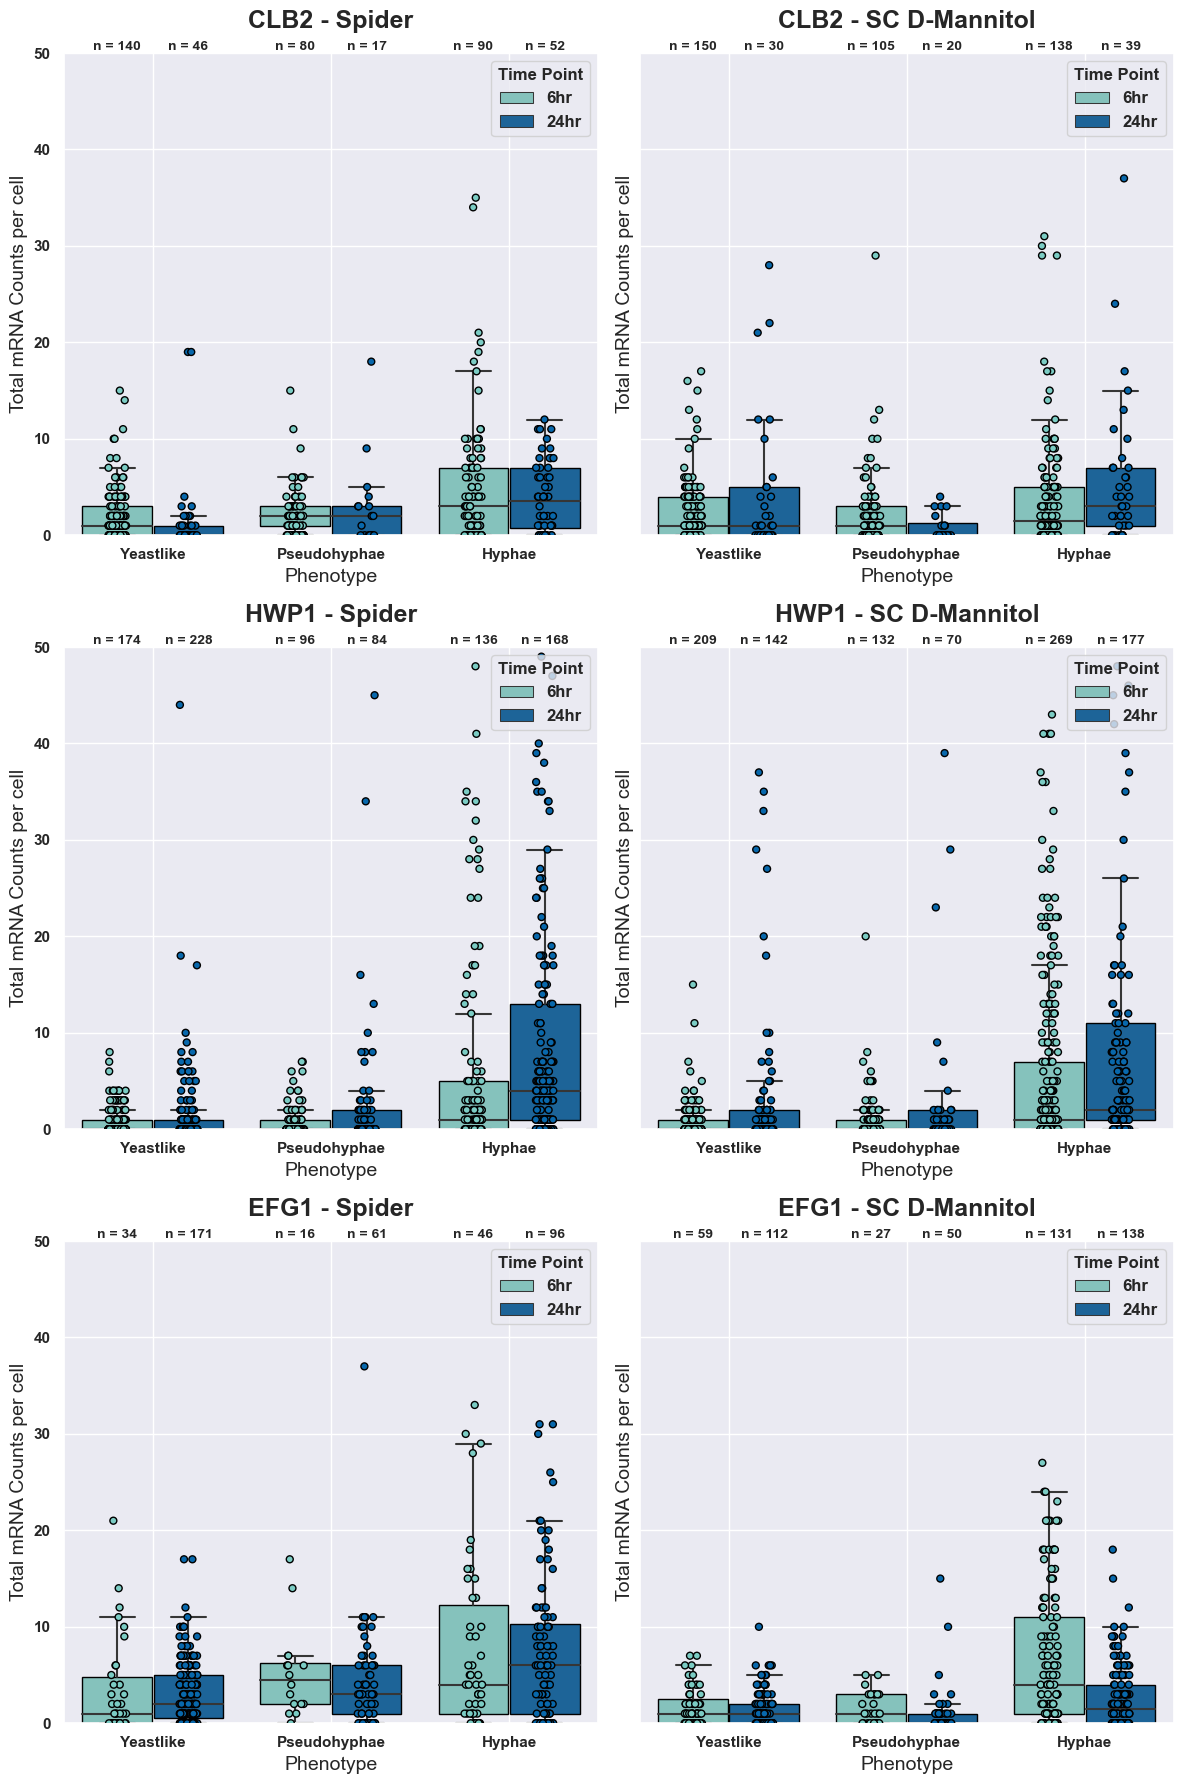

In [14]:
# Reload matplotlib to ensure changes take effect
from importlib import reload
reload(plt)

# Combine Time Point and Subfolder to create a new column for x-axis
combined_data['Time_Subfolder'] = combined_data['Time Point'] + ' ' + combined_data['Subfolder']

# Create Cell_Type column based on eccentricity values
def categorize_eccentricity(eccentricity):
    if eccentricity < 0.85:
        return 'Yeastlike'
    elif 0.85 <= eccentricity < 0.95:
        return 'Pseudohyphae'
    else:
        return 'Hyphae'

combined_data['Cell_Type'] = combined_data['eccentricity'].apply(categorize_eccentricity)

# Create subplots for each folder and subfolder combination
fig, axes = plt.subplots(3, 2, figsize=(12, 18), sharey=True)

# Define the order of x-axis categories
order = ['Yeastlike', 'Pseudohyphae', 'Hyphae']
custom_palette = {'6hr': '#7bccc4', '24hr': '#0868ac'}

# Loop through each folder and subfolder and create plots
for i, folder in enumerate(['CLB2', 'HWP1', 'EFG1']):
    for j, subfolder in enumerate(['Spider', 'SC D-Mannitol']):
        folder_data = combined_data[(combined_data['Folder'] == folder) & (combined_data['Subfolder'] == subfolder)]
        ax = axes[i, j]
        
        # Create box plot without outliers
        sns.boxplot(data=folder_data, 
                    x='Cell_Type', 
                    y='spots_per_cell', 
                    hue='Time Point', 
                    palette=custom_palette, 
                    showfliers=False, 
                    boxprops=dict(edgecolor='black', linewidth=1),
                    width=0.8,
                    dodge=True,
                    order=order,  # Set the order of x-axis categories
                    ax=ax
                   )

        # Overlay scatter plot with stripplot
        sns.stripplot(data=folder_data, 
                      x='Cell_Type', 
                      y='spots_per_cell', 
                      hue='Time Point', 
                      palette=custom_palette,
                      dodge=True,               
                      edgecolor='black', 
                      linewidth=1, 
                      alpha=1, 
                      marker='o',
                      legend=False,
                      order=order,  # Set the order of x-axis categories
                      ax=ax
                     )

        # Set plot title and labels
        ax.set_title(f'{folder} - {subfolder}', pad=18, fontweight='bold', fontsize = 18)
        ax.set_xlabel('Phenotype', fontsize=14)
        ax.set_ylabel('Total mRNA Counts per cell', fontsize=14)
        ax.legend(title='Time Point', fontsize=12, loc='upper right')
        ax.grid(True)
        if folder == 'HWP1':
            plt.ylim(0, 500)  # Adjust y-axis limit if needed
        else:
            plt.ylim(0, 50)

        # Calculate counts of each phenotype for each time point
        counts = folder_data.groupby(['Time Point', 'Cell_Type']).size().reset_index(name='Counts')
        
        stats = folder_data.groupby(['Time Point', 'Cell_Type'])['spots_per_cell'].describe()[['mean', 'std']]
        for cell_type in order:
            mean_6hr = stats.loc[('6hr', cell_type), 'mean']
            std_6hr = stats.loc[('6hr', cell_type), 'std']
            mean_24hr = stats.loc[('24hr', cell_type), 'mean']
            std_24hr = stats.loc[('24hr', cell_type), 'std']
            print(f'Folder: {folder}, Subfolder: {subfolder}, Cell Type: {cell_type}')
            print(f'6hr: Mean: {mean_6hr:.2f}, SD: {std_6hr:.2f}')
            print(f'24hr: Mean: {mean_24hr:.2f}, SD: {std_24hr:.2f}\n')
        
        # Add counts above the corresponding columns
        for xtick, cell_type in enumerate(order):
            count_6hr = counts[(counts['Time Point'] == '6hr') & (counts['Cell_Type'] == cell_type)]['Counts'].values
            count_24hr = counts[(counts['Time Point'] == '24hr') & (counts['Cell_Type'] == cell_type)]['Counts'].values
            if len(count_6hr) > 0:
                ax.text(xtick - 0.2, 50, f'n = {count_6hr[0]}', ha='center', va='bottom', fontsize=10)
            if len(count_24hr) > 0:
                ax.text(xtick + 0.2, 50, f'n = {count_24hr[0]}', ha='center', va='bottom', fontsize=10)

# Adjust layout
plt.tight_layout()
plt.savefig(f'{output_path}/mRNACountsnotmicronSC_D_Mannitol_subplots.png', bbox_inches='tight', dpi=300)  # Reduced DPI to avoid large image size
plt.show()

### Calculating significance using t-tests

In [4]:
from scipy.stats import ttest_ind

# Define folders, subfolders, cell types, and time points
folders = ['CLB2', 'HWP1', 'EFG1']
subfolders = ['Spider', 'SC D-Mannitol']
cell_types = ['Yeastlike', 'Pseudohyphae', 'Hyphae']
time_points = ['6hr', '24hr']

# Perform t-tests for each folder, subfolder, cell type, and time point combination
for folder in folders:
    for subfolder in subfolders:
        for cell_type in cell_types:
            # Filter data for the specific folder, subfolder, cell type, and time points
            data_6hr = combined_data[(combined_data['Folder'] == folder) & 
                                      (combined_data['Subfolder'] == subfolder) & 
                                      (combined_data['Cell_Type'] == cell_type) & 
                                      (combined_data['Time Point'] == '6hr')]['spots_per_cell']
            
            data_24hr = combined_data[(combined_data['Folder'] == folder) & 
                                       (combined_data['Subfolder'] == subfolder) & 
                                       (combined_data['Cell_Type'] == cell_type) & 
                                       (combined_data['Time Point'] == '24hr')]['spots_per_cell']
            
            # Perform Student's t-test
            t_statistic, p_value = ttest_ind(data_6hr, data_24hr)
            
            # Set significance label based on p-value
            if p_value > 0.05:
                significance = 'ns'
            elif p_value <= 0.05 and p_value > 0.01:
                significance = '*'
            elif p_value <= 0.01 and p_value > 0.001:
                significance = '**'
            elif p_value <= 0.001 and p_value > 0.0001:
                significance = '***'
            else:
                significance = '****'
            
            # Print the results
            print(f"Folder: {folder}, Subfolder: {subfolder}, Cell Type: {cell_type}, p-value: {p_value}, Significance: {significance}")
            
            #Significance (*, **, ***, ****) was added to plots using powerpoint

NameError: name 'combined_data' is not defined

### Hyphae length comparison between media and timepoints

C:\Users\roana\AppData\Local\Temp\ipykernel_17900\3836388112.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hyphae_data['major_axis_length_micron'] = hyphae_data['major_axis_length_approx'] * 0.0645


      Unnamed: 0  label  bbox-0  bbox-1  bbox-2  bbox-3     area  \
2              2      3      21     316     327     435   6939.0   
9              9     10     948     441    1006     694   6254.0   
15            15     16     925     791    1327    1210  14742.0   
18            18     19    1046    1107    1174    1143   3540.0   
19            19     20    1034    1196    1196    1263   5453.0   
...          ...    ...     ...     ...     ...     ...      ...   
3718          59     61    1495    2099    2080    2304  15056.0   
3720          61     63    2097    1856    2132    2050   4726.0   
3722          63     65    1799    1740    2304    2158  13339.0   
3723          64     66    1794    1680    2304    1882  11544.0   
3732          73     75     541    1161     763    1778  14672.0   

      eccentricity  spots_per_cell  dense_regions_per_cell  ...  \
2         0.992358               3                       0  ...   
9         0.994108               0               

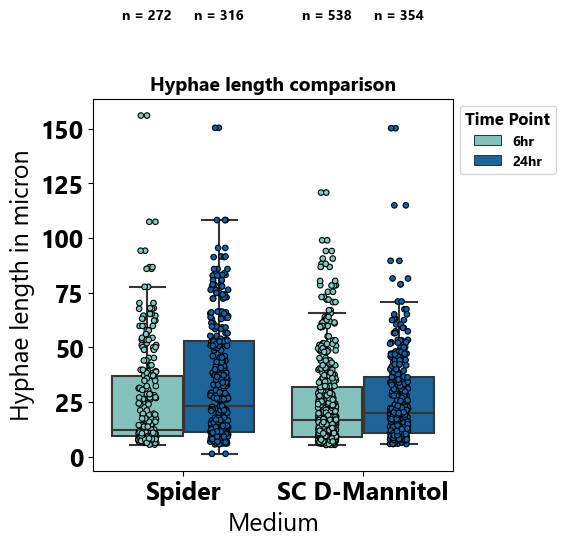

In [143]:
#Filter data for subfolder 1 (adjust subfolder name as needed)
Spider_Data = combined_data[combined_data['Subfolder'] == 'Spider']

# Filter data for subfolder 2 (adjust subfolder name as needed)
SCMAN_Data = combined_data[combined_data['Subfolder'] == 'SC D-Mannitol']

# Concatenate the dataframes for both subfolders
data_comparison = pd.concat([Spider_Data, SCMAN_Data])
hyphae_data = data_comparison[data_comparison['Cell_Type'] == 'Hyphae']
hyphae_data['major_axis_length_micron'] = hyphae_data['major_axis_length_approx'] * 0.0645

print(hyphae_data)

# Define custom palette with colors for each time point
custom_palette = {'6hr': '#7bccc4', '24hr': '#0868ac'}

# Create the bar plot
plt.figure(figsize=(6, 6))

# Plot data for both subfolders
sns.boxplot(data=hyphae_data, 
            x='Subfolder', 
            y='major_axis_length_micron', 
            hue='Time Point', 
            palette=custom_palette, 
            dodge=True,
           sym="")

sns.stripplot(data=hyphae_data, 
              x='Subfolder', 
              y='major_axis_length_micron', 
              hue='Time Point', 
              palette=custom_palette,
              dodge=True,               
              edgecolor='black', 
              linewidth=0.8, 
              alpha=1, 
              marker='o',
              jitter=True,  # Add jitter to scatterplot points for better visibility
              size=4, # Adjust marker size
              legend=False
             )


for i, subfolder in enumerate(hyphae_data['Subfolder'].unique()):
    for j, time_point in enumerate(hyphae_data['Time Point'].unique()):
        count = hyphae_data[(hyphae_data['Subfolder'] == subfolder) & (hyphae_data['Time Point'] == time_point)].shape[0]
        plt.text(i + j * 0.4 - 0.2, 200, f'n = {count}', ha='center', fontsize=10)  # Adjust y-coordinate and fontsize as needed
    
# Customize the plot
plt.title('Hyphae length comparison', fontsize = 14,fontweight = 'bold')
plt.xlabel('Medium')
plt.ylabel('Hyphae length in micron')
plt.legend(title='Time Point', fontsize=10, title_fontsize=12, bbox_to_anchor=(1.0, 1), loc='upper left')
# Show the plot
plt.tight_layout()
plt.show()

## 5.1 - Histograms of mRNA counts and eccentricity

In [15]:
#TRYING SOME STUFF HERE

figure, ax= plt.subplots(figsize=(10,5))
ax=sns.histplot(data=df[(df['mRNA']=='CLB2Q670')], x='total_RNAs_per_cell'
                ,hue='condition',bins=50,ax=ax,palette='deep', stat=)
ax.set_title('CLB2' )

plt.savefig(f'{root_dir}/Plots)


SyntaxError: invalid syntax (<ipython-input-15-c4ac6b23efcc>, line 5)

Text(0.5, 1.0, 'CLB2')

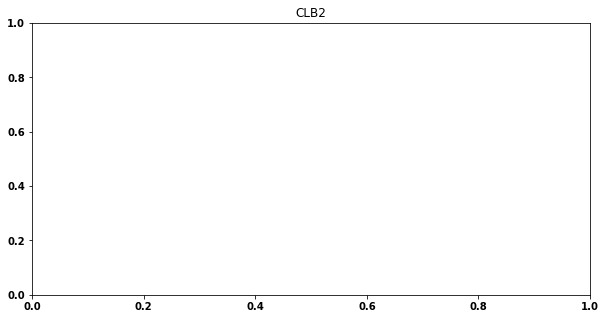

In [14]:
figure, ax= plt.subplots(figsize=(10,5))
ax=sns.histplot(data=df[(df['mRNA']=='CLB2Q670')], x='total_RNAs_per_cell'
                ,hue='condition',bins=50,binwidth=5,ax=ax,palette='deep')
ax.set_title('CLB2' )

#plt.savefig(f'{root_dir}/Plots/FV-CLB2Q670_histplot.svg')

Text(0.5, 1.0, 'HWP1')

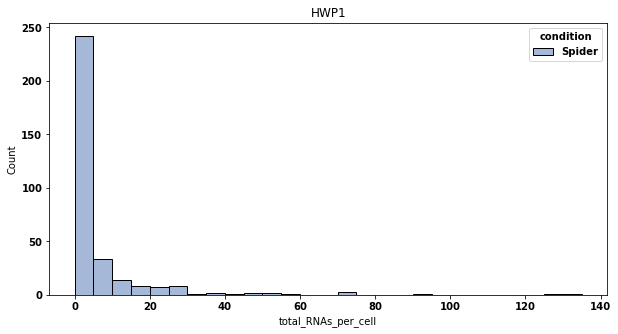

In [15]:
figure, ax= plt.subplots(figsize=(10,5))
ax=sns.histplot(data=df[(df['mRNA']=='HWP1Q610')], x='total_RNAs_per_cell'
                ,hue='condition',bins=50,binwidth=5,ax=ax,palette='deep')
ax.set_title('HWP1' )

#plt.savefig(f'{root_dir}/Plots/FV-HWP1Q610_histplot.svg')

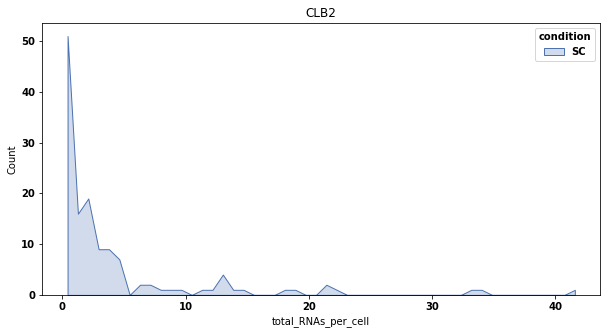

In [38]:
figure,ax= plt.subplots(figsize=(10,5))
ax=sns.histplot(
    data=df[(df['mRNA']=='CLB2Q670')], x='total_RNAs_per_cell',hue='condition',bins=50,ax=ax, 
    element="poly",palette='deep')
ax.set_title('CLB2')

#plt.savefig('G:/Code/smFISH/data/spider_1_CLB2_HWP1_24HR/Plots/FV_CLB2Q670_polyplot.svg')

Text(0.5, 1.0, 'HWP1')

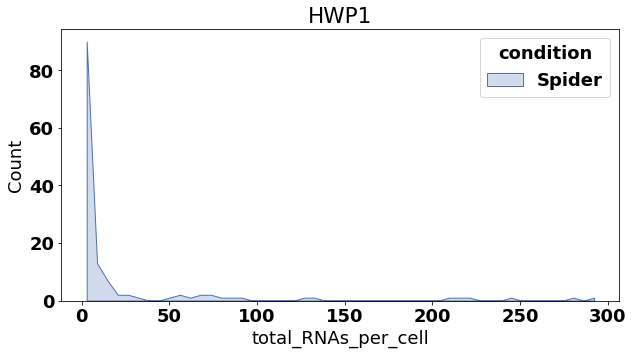

In [23]:
figure,ax= plt.subplots(figsize=(10,5))
ax=sns.histplot(
    data=df[(df['mRNA']=='HWP1Q610')], x='total_RNAs_per_cell',hue='condition',bins=50,ax=ax, 
    element="poly",palette='deep')
ax.set_title('HWP1')

#plt.savefig('G:/Code/smFISH/data/spider_1_CLB2_HWP1_24HR/Plots/FV_HWP1Q610_polyplot.svg')

Text(0.5, 1.0, 'Eccentricity')

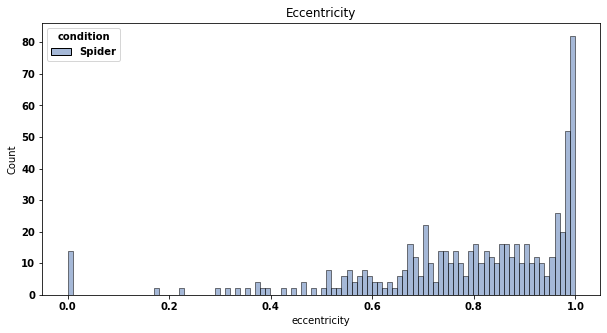

In [16]:
figure,ax= plt.subplots(figsize=(10,5))
ax=sns.histplot(data=df, x='eccentricity',hue='condition',bins=100,ax=ax, palette='deep')
ax.set_title('Eccentricity' )

#plt.savefig(f'{root_dir}/Plots/FV_Eccenticity_histplot.svg')

***

## 5.2 - KDEplots mRNA vs eccentricity

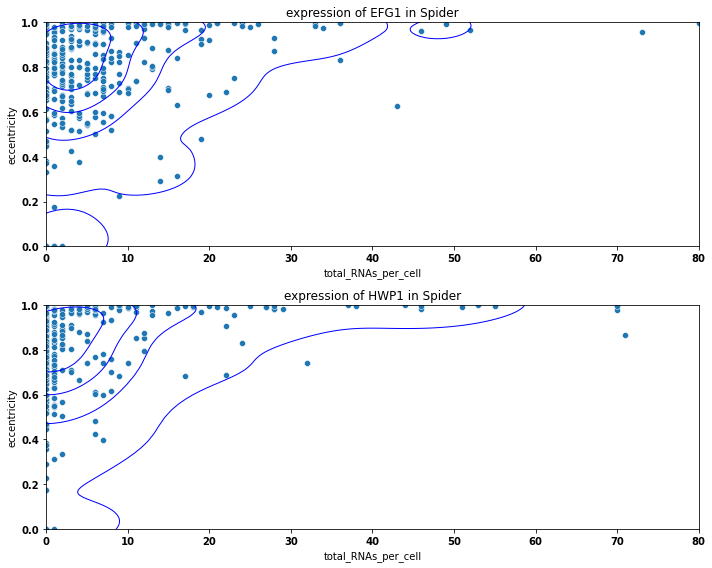

In [17]:
nrows = len(mRNAs)
ncols = len(conditions)

figure, axes= plt.subplots(nrows=nrows, ncols=ncols, figsize=(10,8))
axes = np.array(axes).reshape(nrows, ncols)

for row, mRNA in enumerate(mRNAs):
    for col, condition in enumerate(conditions):
        sns.scatterplot(data=df[(df['mRNA']==mRNA) & (df['condition']==condition)], x='total_RNAs_per_cell',y='eccentricity',ax=axes[row,col],palette='viridis')
        sns.kdeplot(data=df[(df['mRNA']==mRNA) & (df['condition']==condition)],x='total_RNAs_per_cell',y='eccentricity', levels=5, color="b", linewidths=1,ax=axes[row, col])
        axes[row,col].set_xlim(0,80)
        axes[row,col].set_ylim(0,1)
        
        axes[row,col].set_title(f'expression of {mRNA.split("Q")[0]} in {condition}')
        
plt.savefig(f'{root_dir}/Plots/scatter_kdeplot_{mRNA}_{condition}.svg')
plt.tight_layout()

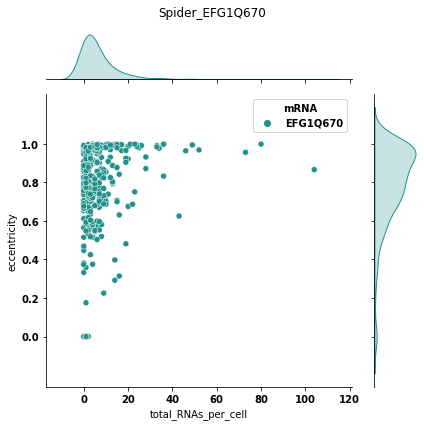

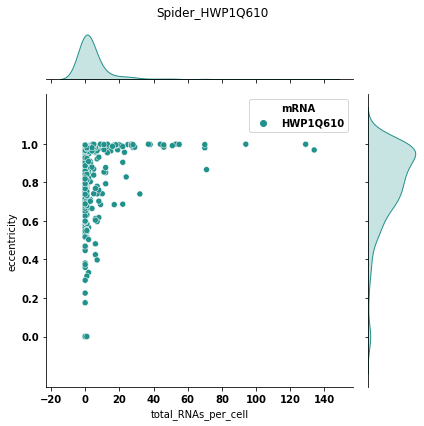

In [18]:
nrows = len(mRNAs)
ncols = len(conditions)

axes = np.array(axes).reshape(nrows, ncols)
for row, mRNA in enumerate(mRNAs):
    for col, condition in enumerate(conditions):

        g=sns.jointplot(data=df[(df['mRNA']==mRNA) & (df['condition']==condition)],x='total_RNAs_per_cell',y='eccentricity',palette='viridis', color="b", linewidths=1,hue="mRNA")
        g.ax_joint.set_yticks([x/10 for x in range(0,12,2)])
        plt.suptitle(f'{condition}_{mRNA}')
        plt.tight_layout()
        plt.savefig(f'{root_dir}/Plots/fv_jointplot_{mRNA}_{condition}.svg')

***

## 5.3 - Stripplots

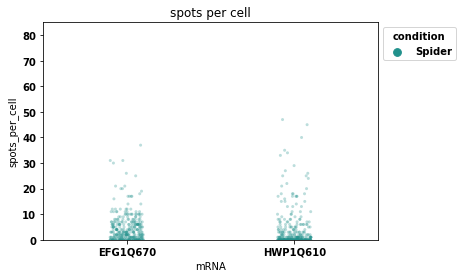

In [19]:
ax = sns.stripplot(
    data=df,
    x="mRNA", 
    y="spots_per_cell", 
    orient="v",palette='viridis' ,hue='condition',dodge=True, s=3, alpha=0.3)

ax.set_title('spots per cell')
ax.set_ylim(0,85)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

#plt.savefig(f'{root_dir}/Plots/stripplot_spot_per_cell.svg')

### <span style="color:seagreen"> 5.3.1 - Plotting only expressing cells </span>

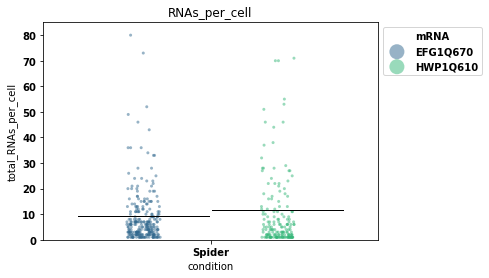

In [20]:
ax=sns.stripplot(
    data=df[df['total_RNAs_per_cell']>0],
    x="condition", y="total_RNAs_per_cell", orient="v",palette='viridis' ,hue='mRNA',dodge=True, s=3, alpha=0.5
)
ax.set_title('RNAs_per_cell')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set_ylim(0,85)

# plot the mean line
sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 1},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x="condition",
            y="total_RNAs_per_cell",
            hue='mRNA',
            data=df[df['total_RNAs_per_cell']>0],
            showfliers=False,
            showbox=False,
            showcaps=False)
plt.legend(title='mRNA', loc='upper right', labels=['EFG1Q670', 'HWP1Q610'],markerscale=5)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

plt.savefig(f'{root_dir}/Plots/FV_stripplot_total_RNAs.svg')

### <span style="color:seagreen"> 5.3.2 - Plotting nascent mRNA per cell </span>

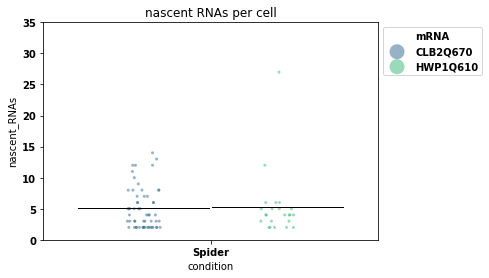

In [21]:
ax=sns.stripplot(
    data=df[df['nascent_RNAs']>0],
    x="condition", y="nascent_RNAs", orient="v",palette='viridis' ,hue='mRNA',dodge=True, s=3, alpha=0.5
)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

ax.set_title('nascent RNAs per cell')
ax.set_ylim(0,35)

# plot the mean line
sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 1},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x="condition",
            y="nascent_RNAs",
            hue='mRNA',
            data=df[df['nascent_RNAs']>0],
            showfliers=False,
            showbox=False,
            showcaps=False)
plt.legend(title='mRNA', loc='upper right', labels=['CLB2Q670', 'HWP1Q610'],markerscale=5)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

plt.savefig(f'{root_dir}/Plots/FV_nascent_stripplot.svg')

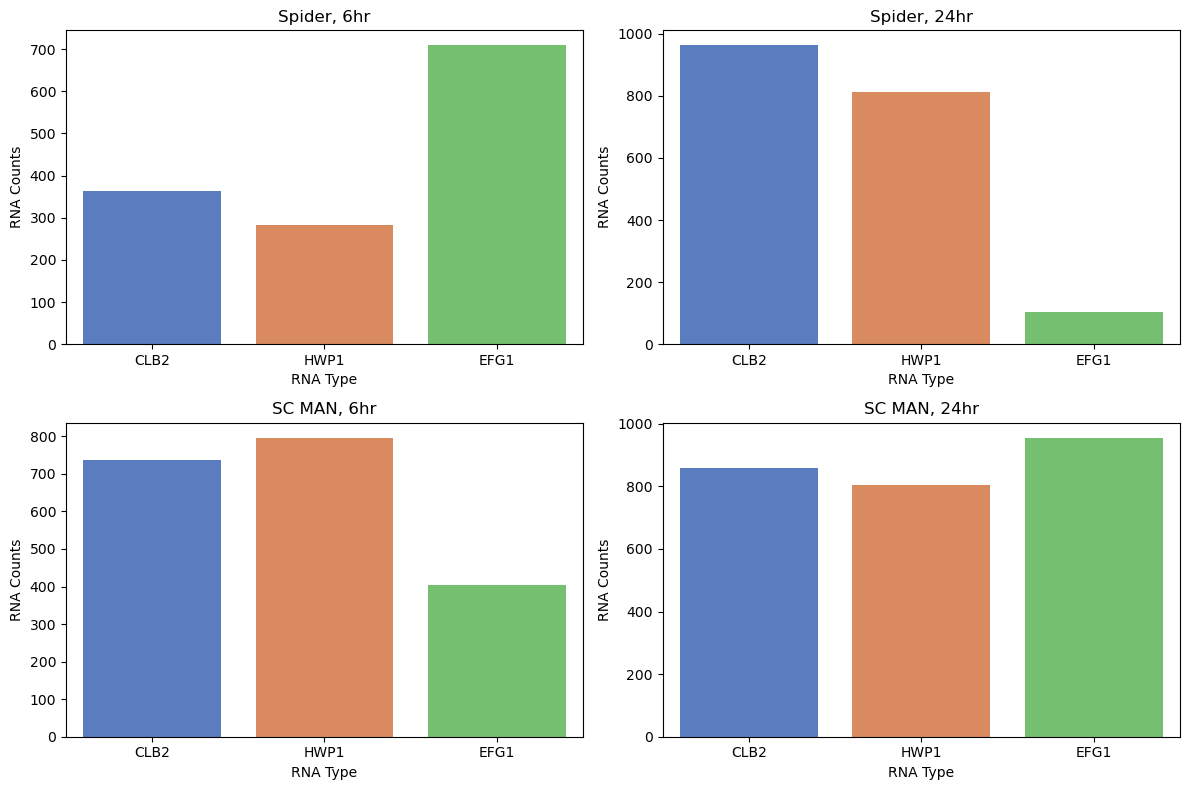

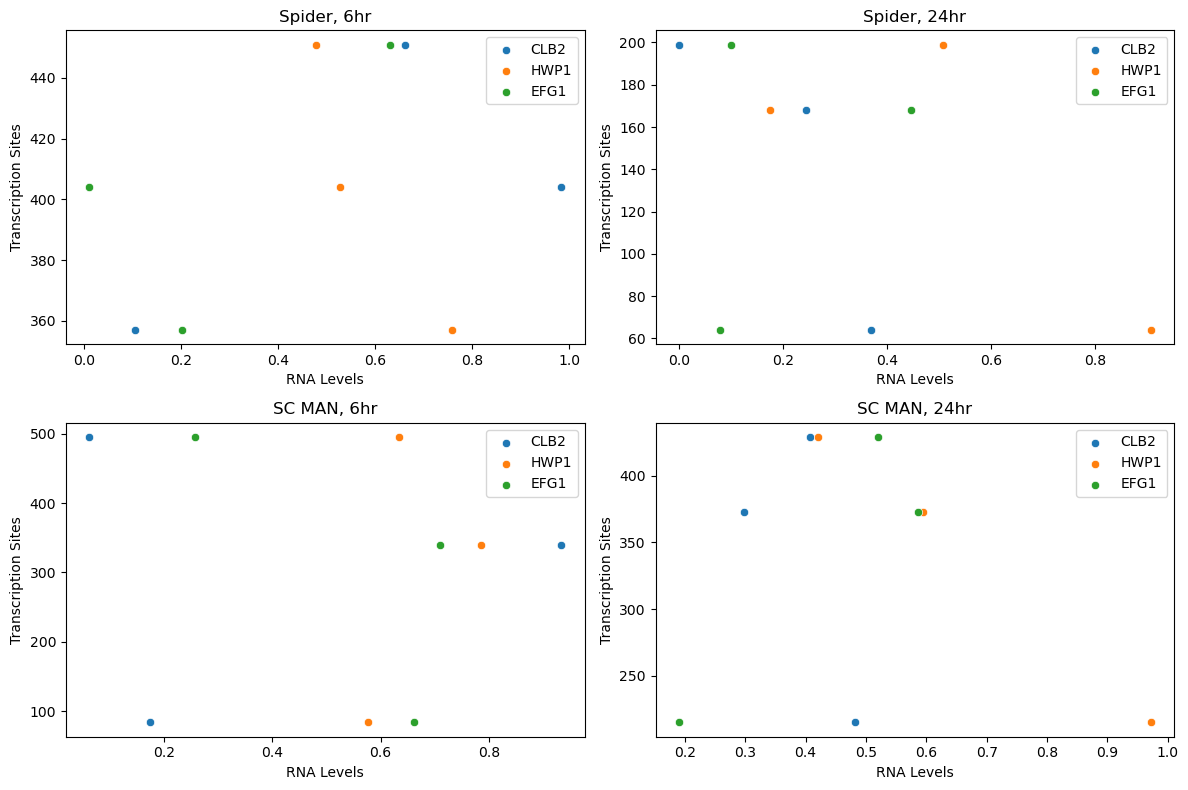

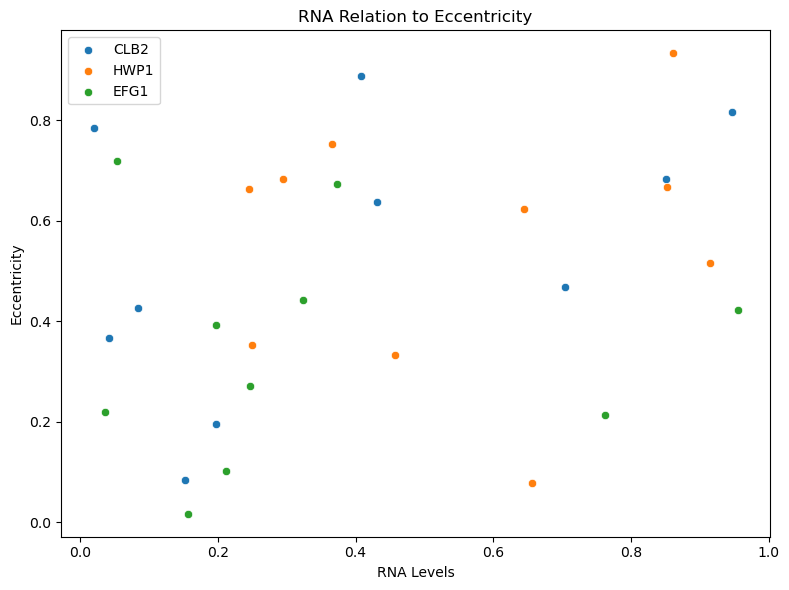

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Example data (replace this with your actual data)
media = ['Spider', 'Spider', 'SC MAN', 'SC MAN']
timestamp = ['6hr', '24hr', '6hr', '24hr']
rna_types = ['CLB2', 'HWP1', 'EFG1']
rna_counts = np.random.randint(100, 1000, size=(4, 3))
transcription_sites = np.random.randint(50, 500, size=(4, 3))

# RNA Counts Comparison
plt.figure(figsize=(12, 8))
for i, (m, t) in enumerate(zip(media, timestamp)):
    plt.subplot(2, 2, i + 1)
    sns.barplot(x=rna_types, y=rna_counts[i], palette='muted')
    plt.title(f'{m}, {t}')
    plt.xlabel('RNA Type')
    plt.ylabel('RNA Counts')
plt.tight_layout()

# Transcription Sites Comparison
plt.figure(figsize=(12, 8))
for i, (m, t) in enumerate(zip(media, timestamp)):
    plt.subplot(2, 2, i + 1)
    for j, rna in enumerate(rna_types):
        sns.scatterplot(x=np.random.rand(3), y=transcription_sites[i], label=rna)
    plt.title(f'{m}, {t}')
    plt.xlabel('RNA Levels')
    plt.ylabel('Transcription Sites')
    plt.legend()
plt.tight_layout()

# RNA Relation to Eccentricity
plt.figure(figsize=(8, 6))
for rna in rna_types:
    sns.scatterplot(x=np.random.rand(10), y=np.random.rand(10), label=rna)
plt.title('RNA Relation to Eccentricity')
plt.xlabel('RNA Levels')
plt.ylabel('Eccentricity')
plt.legend()
plt.tight_layout()

plt.show()